**CCD Project Results**
*created by Jordan Muraskin*

In [25]:
% pylab inline
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot,plot
init_notebook_mode()
import CCD_packages
reload(CCD_packages)
print 'First SLIDE'

Populating the interactive namespace from numpy and matplotlib


/home/jmuraskin/miniconda/envs/cpac040/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy



First SLIDE


In [24]:
! git pull

Updating 8af1f8b..1d6e122
Fast-forward
 .gitignore                 |   2 +
 analysis/CCD-Results.ipynb | 637 +++++++++++++++++++++++++++++++++++++++++++++
 analysis/RSN/RSN0.png      | Bin 0 -> 20646 bytes
 analysis/RSN/RSN1.png      | Bin 0 -> 18763 bytes
 analysis/RSN/RSN2.png      | Bin 0 -> 20152 bytes
 analysis/RSN/RSN3.png      | Bin 0 -> 19304 bytes
 analysis/RSN/RSN4.png      | Bin 0 -> 15747 bytes
 analysis/RSN/RSN5.png      | Bin 0 -> 18380 bytes
 analysis/RSN/RSN6.png      | Bin 0 -> 20050 bytes
 analysis/RSN/RSN7.png      | Bin 0 -> 20672 bytes
 analysis/RSN/RSN8.png      | Bin 0 -> 18475 bytes
 analysis/RSN/RSN9.png      | Bin 0 -> 18214 bytes
 12 files changed, 639 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 analysis/CCD-Results.ipynb
 create mode 100644 analysis/RSN/RSN0.png
 create mode 100644 analysis/RSN/RSN1.png
 create mode 100644 analysis/RSN/RSN2.png
 create mode 100644 analysis/RSN/RSN3.png
 create mode 100644 analysis/RSN/RSN4.png
 create mo

Get Subject Info

In [26]:
GroupDF,motionInfo=CCD_packages.getCCDSubjectData()

Select which subjects to use

In [27]:
goodsubj = CCD_packages.getSubjectList(GroupDF=GroupDF)

**Resting State Network Time Series with Model**

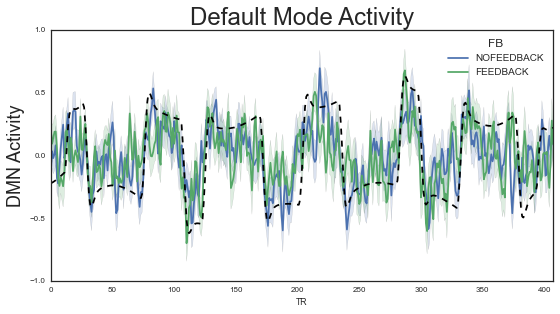

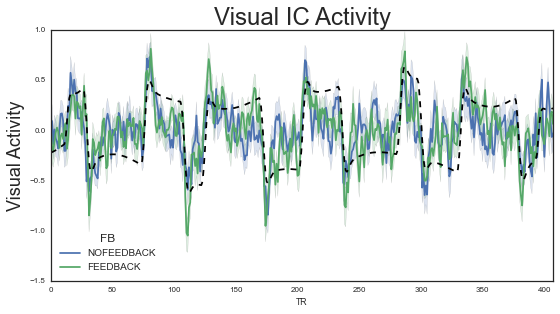

In [28]:
CCD_packages.createTimeSeriesPlots(GroupDF,goodsubj,DMN_name='RSN3',title='Default Mode Activity',ylabel='DMN Activity',figsize=(9,4.5))
CCD_packages.createTimeSeriesPlots(GroupDF,goodsubj,DMN_name='RSN0',title='Visual IC Activity',ylabel='Visual Activity',figsize=(9,4.5))

**Model Correlations for Each Subject**

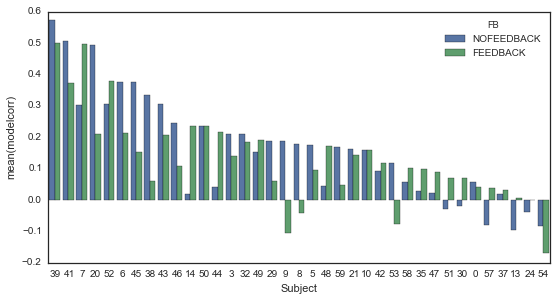

In [29]:
CCD_packages.createSubjectModelBarPlot(GroupDF,goodsubj,figsize=(9,4.5),savefig=True)

**Scan Order model correlations**

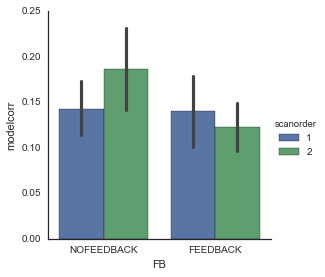

In [30]:
CCD_packages.createScanOrderBarPlot(GroupDF,goodsubj)

**Output Mean Subject Model Correlations for Default Mode Network**

In [31]:
# print 'RSN3'
CCD_packages.printModelCorrelations(GroupDF,goodsubj,'RSN3')

No Feedback Focus Correlation= -0.70
Feedback Focus Correlation= -0.57
No Feedback Wander Correlation= 0.67
Feedback Wander Correlation= 0.59
No Feedback Overall Correlation= 0.70
Feedback Overall Correlation= 0.60


In [32]:
print 'RSN0'
CCD_packages.printModelCorrelations(GroupDF,goodsubj,'RSN0')

RSN0
No Feedback Focus Correlation= -0.54
Feedback Focus Correlation= -0.67
No Feedback Wander Correlation= 0.55
Feedback Wander Correlation= 0.66
No Feedback Overall Correlation= 0.56
Feedback Overall Correlation= 0.69


In [33]:
hmFB,hmNFB,hmDiff=CCD_packages.generateHeatMaps(GroupDF,goodsubj)

**Resting State Network Connectivity Matrices**

In [34]:
fig=CCD_packages.heatmap2Chord(hmFB,plotName='FeedbackChordDiagram',title='Network Correlations with Feedback On',savefig=False,scale=[-1,1])
iplot(fig)

In [35]:
iplot(CCD_packages.heatmap2Chord(hmNFB,plotName='FeedbackChordDiagram',title='Network Correlations with Feedback Off',savefig=False,scale=[-1,1]))

In [36]:
from scipy.stats import ttest_1samp
from mne.stats.multi_comp import fdr_correction
from numpy import triu_indices,tril_indices
t,p=ttest_1samp(hmDiff,0,axis=2)
row,column=triu_indices(10,1)
rowl,columnl=tril_indices(10)
# sns.heatmap(t)
p05,padj=fdr_correction(p[row,column],0.05)
fdr_corrected=t.copy()
fdr_corrected[rowl,columnl]=0
fdr_corrected[row,column]=t[row,column]*p05

**Pairwise Differences between Feedback On vs. Feedback Off Resting State Network Connectivity**

In [37]:
iplot(CCD_packages.heatmap2Chord(fdr_corrected,plotName='FeedbackDiffChordDiagram',title='Network Correlations differences between Feedback On/Off',savefig=False,scale=[-10,10]))

In [38]:
predictions,coefs,performance,fb_coefs,nfb_coefs=CCD_packages.linearRegressionData(GroupDF,goodsubj,numFolds=10)

Running Feedback on Regressions
Finished...
Running Feedback off Regressions
Finished...


**10-Fold Linear Regression Model Prediction with RSN Timeseries**

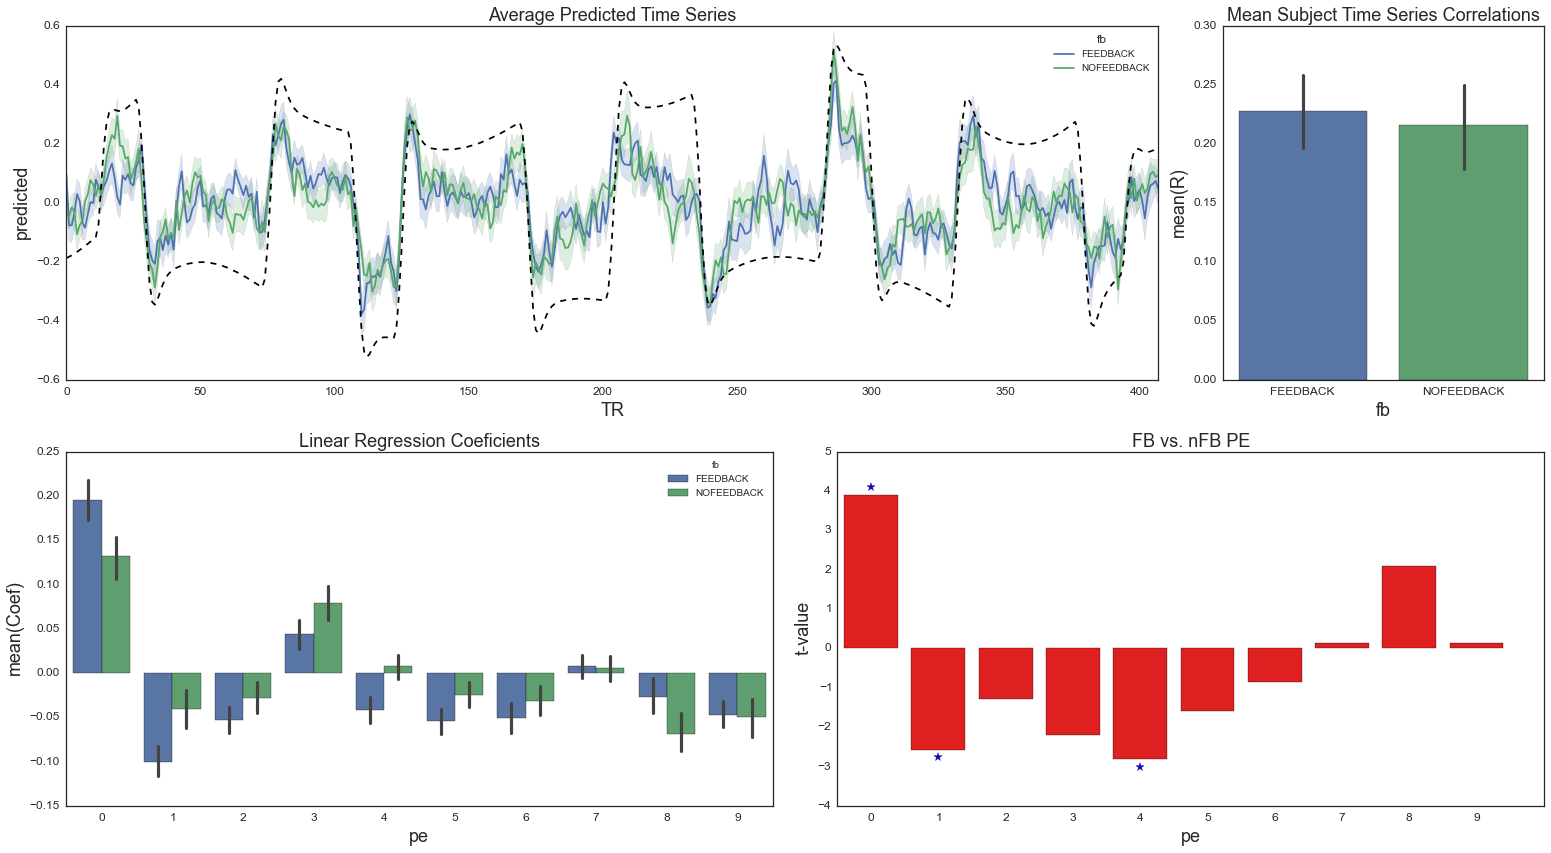

In [39]:
CCD_packages.createRegressionPlots(predictions,performance,coefs,fb_coefs,nfb_coefs,GroupDF,goodsubj)

* *-Indicates p<0.05 FDR-Corrected Feedback On vs. Feedback Off 